# Project-2 Customer Segenmentation Using K-Means Clusturing

### Business Understanding:- In the populous country like India . There is growing no. of malls in the cities to fulfill demands from the huge no. of customers. Also as no. grows the competition also grows . Customers get many choices for shopping and frequently changes theier shopping distinations . For business growth it is important to hold customers buy fulfilling their demands.
   ### Our goal is to segregate customers in two groups. One having customers who purchase alot in the mall. And other having customers who hesitate to buy or buy little from that mall . This would help us to cluster customers in different groups ,to Know their choices and mainly to choose better business strategy to fulfill customer demands and grow business .

#### Importing Required libraries

In [1]:
import numpy as np                  # To use numpy arrays
import pandas as pd                 # To create Dataframe and to perform EDA 
import matplotlib.pyplot as plt
import seaborn as sns               # Matplotlib and Seaborn libraries are for visulaization
from sklearn.cluster import KMeans  # K-Means Clusturing Algorithm

### 2) Data Collection and Cleaning

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv(r'C:\Users\PRANIT SAWANT\Downloads\PORTFOLIO\jupyter notebooks and datasets to build portfolio projects and practice\Datasets\Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.shape      # To get size of the data

(200, 5)

In [5]:
df.info()    # To get basic information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()           # To get stastitical summary of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()     # To check for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### We will choose last two columns for customers clustering as below

In [8]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
# finding within clustures sum of of squres (wcss) value for different number of clusters

wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=10, init='k-means++')
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37271.8862365895,
 30273.394312070042,
 25022.48500453035,
 21881.878507060967,
 19669.71099830122,
 18163.57967129489,
 15810.343426539728,
 14436.749286824288,
 13203.138658804965,
 12213.032722179782,
 11045.38028024607,
 10151.42972027972,
 9210.149014204188,
 8762.969258519257,
 8019.991676815654]

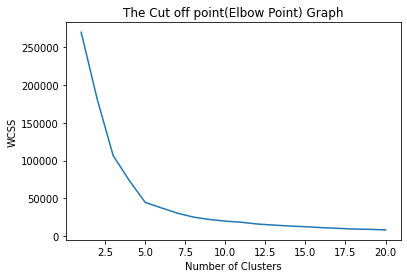

In [10]:
# plot an elbow graph
x=[i for i in range(1,21)]
plt.plot(x,wcss)
plt.title('The Cut off point(Elbow Point) Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### We were looking for sharp bend in the line graph to get cluster's no.  Here are two bends . But we have to choose point after which their is no significant change in values means no bend in the graph. 
#### We got ,Optimum Number of Clusters = 5

### Training the k-Means Clustering Model 

In [11]:
# Tp return a label for each data point in the X list based on their cluster
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=4)

Y = kmeans.fit_predict(X)

print(Y)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


### Visualizing all the Clusters of customers

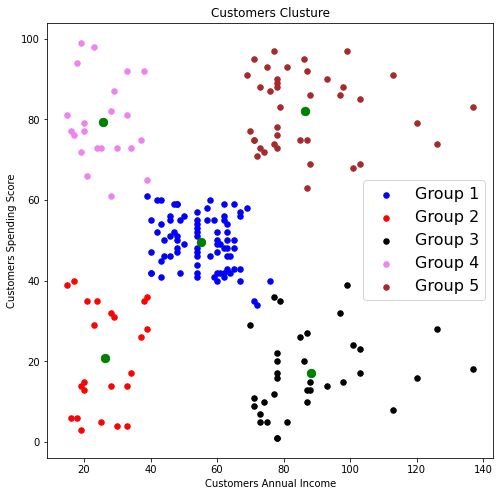

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='blue')
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='red')
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='black')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='violet')
plt.scatter(X[Y==4,0], X[Y==4,1], s=30, c='brown')

# For the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='green')

plt.title('Customers Clusture')
plt.xlabel('Customers Annual Income')
plt.ylabel('Customers Spending Score')
plt.legend(['Group 1','Group 2','Group 3','Group 4','Group 5'],fontsize=16)
plt.show()

### Conclusion:-
### 1) Group 4 customers belongs to low annual income group but they are also spending more in the mall .
### 2) Group 2 customers have low income and they are spending little . It's represent general tendency as the lower income people tend to spend little.
### 3) Group 3 customers are belong to high income group but they spend least as like group 2.They are using money  causiously.
### 4) Group 1 customers are spending nearly same money as their annual income.
### 5) Lastly Group 5 customers same as the group 1 customers spend close to the annual income amount.

#### What the business firm can do to increase their income ?
#### 1) We can give offers and discounts on buying for the customers from group 2 who are spending low beacuse of low income.
#### 2) We can also store important commodities for customers in group 3 who are spending less even having high income. We can try to know their interests , favourite brands and can put them for sale in the mall.
#### 3) For the customers in the groups like group 4 and group 5 , even thought they are spending well , we can take their feedback and could correct any deficiency ,shortfall in service and fullfill their demands